In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

In [97]:
train = pd.read_csv("train_loan.csv")
test = pd.read_csv("test_loan.csv")

In [98]:
#Taking copy so that if we need to make any changes in this dataset we will not lose the original dataset
train_org = train.copy()
test_org = test.copy()

In [99]:
train.columns,test.columns

(Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
       dtype='object'),
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
        'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
        'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
       dtype='object'))

In [100]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [101]:
train.shape,test.shape

((614, 13), (367, 12))

In [102]:
#Univariate Analysis
#As we have target variable (Loan_Status), we need to find frequency table, percentage distribution and bar plot for the variable
train["Loan_Status"].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [103]:
#To have the proportion instead number we need set normalize as true
train["Loan_Status"].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

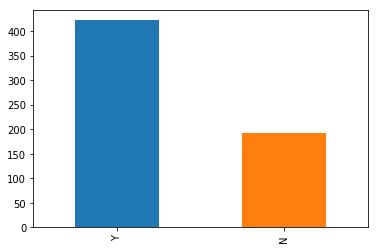

In [104]:
#Bar Plot
train["Loan_Status"].value_counts().plot.bar()

In [105]:
#From above methods we can say that loan of 69% people out of 614 is approved

In [106]:
'''
Now lets visualize each variable separately. 
Different types of variables are Categorical, ordinal and numerical.

Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)

Ordinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)

Numerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

Let’s visualize the categorical and ordinal features first.
'''

'\nNow lets visualize each variable separately. \nDifferent types of variables are Categorical, ordinal and numerical.\n\nCategorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)\n\nOrdinal features: Variables in categorical features having some order involved (Dependents, Education, Property_Area)\n\nNumerical features: These features have numerical values (ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)\n\nLet’s visualize the categorical and ordinal features first.\n'

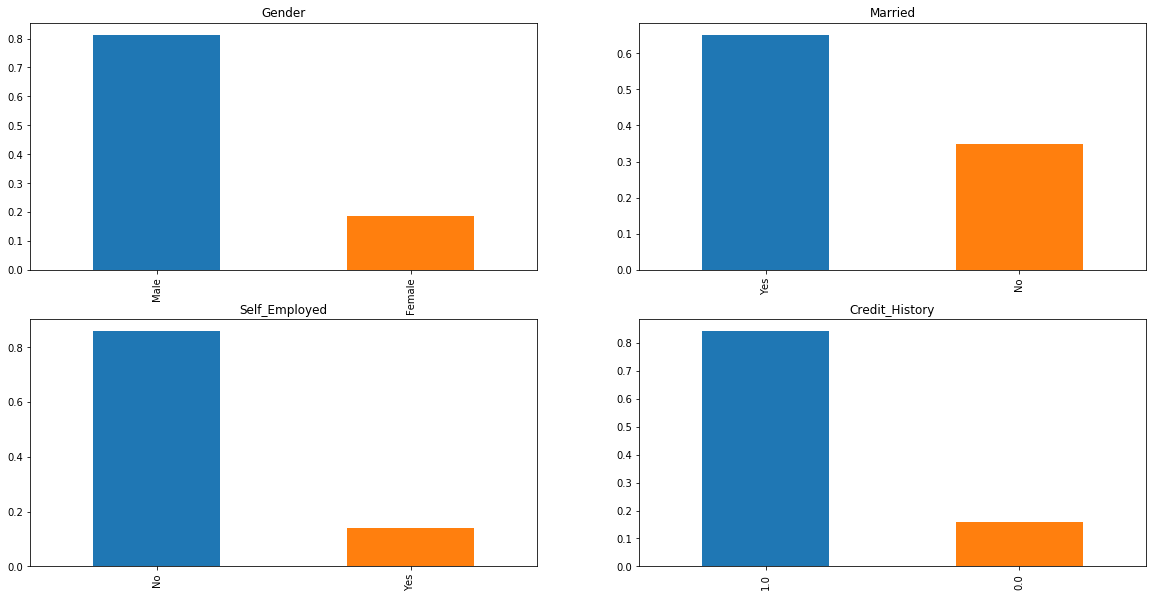

In [107]:
#Categorical features
plt.subplot(221) ,train["Gender"].value_counts(normalize=True).plot.bar(figsize = (20,10),title='Gender')
plt.subplot(222) ,train["Married"].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223) ,train["Self_Employed"].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224) ,train["Credit_History"].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

In [108]:
'''
It can be inferred from the above bar plots that:

80% applicants in the dataset are male.
Around 65% of the applicants in the dataset are married.
Around 15% applicants in the dataset are self employed.
Around 85% applicants have repaid their debts.
'''

'\nIt can be inferred from the above bar plots that:\n\n80% applicants in the dataset are male.\nAround 65% of the applicants in the dataset are married.\nAround 15% applicants in the dataset are self employed.\nAround 85% applicants have repaid their debts.\n'

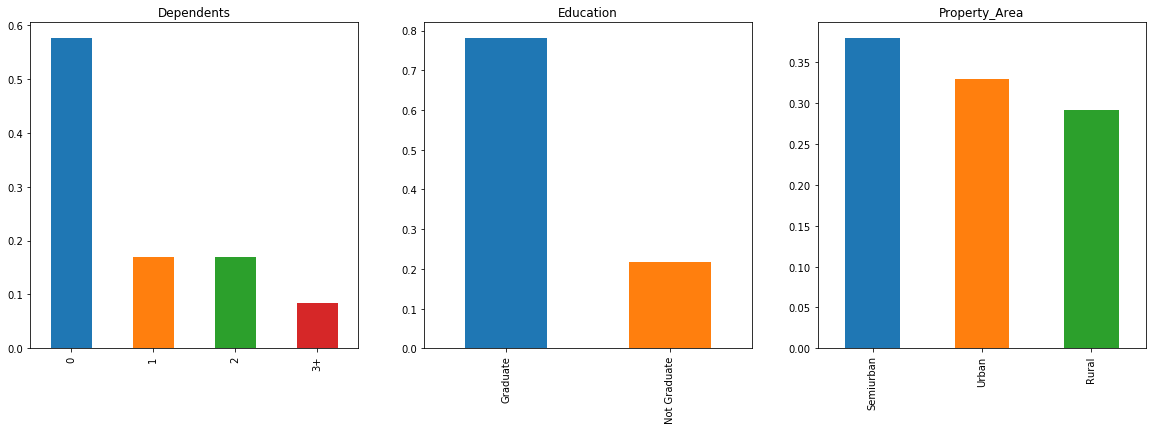

In [109]:
#Ordinal features
plt.subplot(131) ,train["Dependents"].value_counts(normalize=True).plot.bar(figsize=(20,6),title="Dependents")
plt.subplot(132) ,train["Education"].value_counts(normalize=True).plot.bar(title="Education")
plt.subplot(133) ,train["Property_Area"].value_counts(normalize=True).plot.bar(title="Property_Area")
plt.show()

In [110]:
'''
Following inferences can be made from the above bar plots:

Most of the applicants don’t have any dependents.
Around 80% of the applicants are Graduate.
Most of the applicants are from Semiurban area.
'''

'\nFollowing inferences can be made from the above bar plots:\n\nMost of the applicants don’t have any dependents.\nAround 80% of the applicants are Graduate.\nMost of the applicants are from Semiurban area.\n'

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


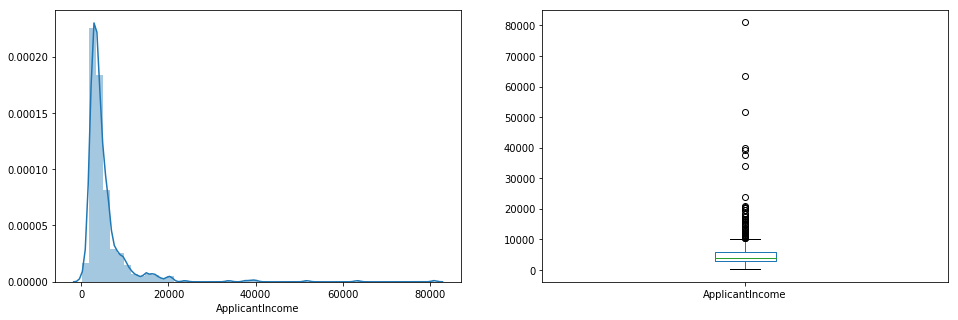

In [111]:
#Numerical feature
plt.subplot(121) ,sns.distplot(train["ApplicantIncome"])
plt.subplot(122) ,train["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

In [112]:
'''
It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not 
normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally 
distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity
in the society. Part of this can be driven by the fact that we are looking at people with different education levels. 
Let us segregate them by Education:
'''

'\nIt can be inferred that most of the data in the distribution of applicant income is towards left which means it is not \nnormally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally \ndistributed.\n\nThe boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity\nin the society. Part of this can be driven by the fact that we are looking at people with different education levels. \nLet us segregate them by Education:\n'

(<matplotlib.axes._subplots.AxesSubplot at 0x286a11104e0>, Text(0.5, 0.98, ''))

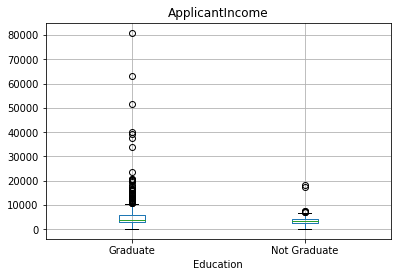

In [113]:
train.boxplot(column="ApplicantIncome",by="Education"),plt.suptitle("")

In [114]:
'''
We can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.
'''

'\nWe can see that there are a higher number of graduates with very high incomes, which are appearing to be the outliers.\n'

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


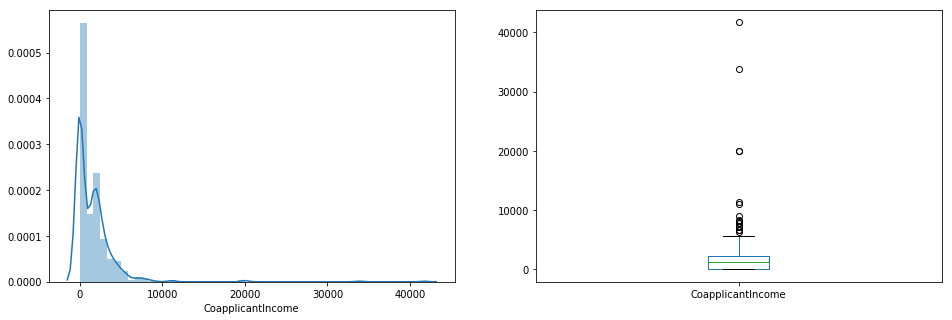

In [115]:
plt.subplot(121) ,sns.distplot(train["CoapplicantIncome"])
plt.subplot(122) ,train["CoapplicantIncome"].plot.box(figsize=(16,5))
plt.show()

In [116]:
'''
We see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. 
We also see a lot of outliers in the coapplicant income and it is not normally distributed.
'''

'\nWe see a similar distribution as that of the applicant income. Majority of coapplicant’s income ranges from 0 to 5000. \nWe also see a lot of outliers in the coapplicant income and it is not normally distributed.\n'

C:\Users\User\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


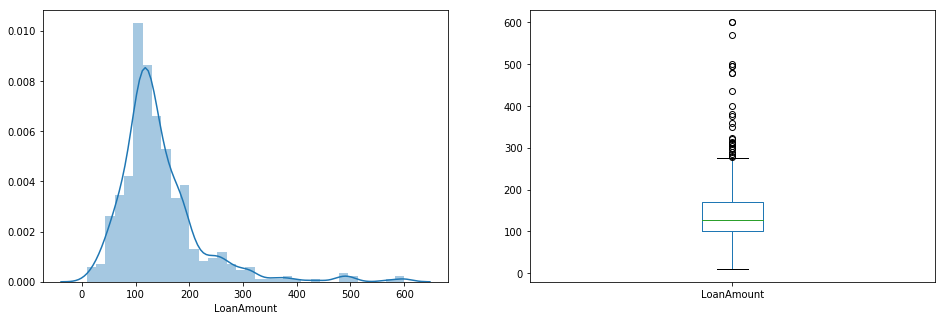

In [117]:
df=train.dropna()
plt.subplot(121) ,sns.distplot(df["LoanAmount"])
plt.subplot(122) ,df["LoanAmount"].plot.box(figsize=(16,5))
plt.show()

In [118]:
'''
We see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.
'''

'\nWe see a lot of outliers in this variable and the distribution is fairly normal. We will treat the outliers in later sections.\n'

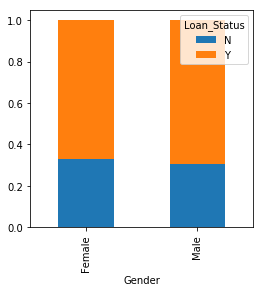

In [119]:
#Bivariate Analysis
#Using this analysis we can get the feature that have good relation with target variable
#Categorical feature
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [120]:
'''
It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans
'''

'\nIt can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans\n'

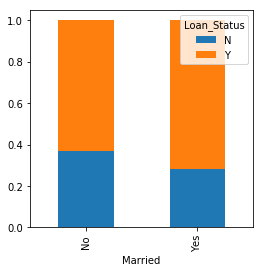

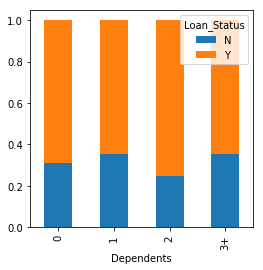

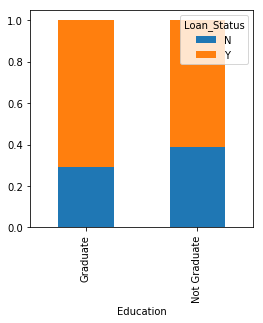

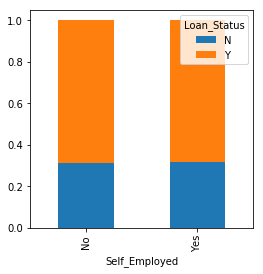

In [121]:
Married = pd.crosstab(train['Married'],train['Loan_Status'])
Dependents = pd.crosstab(train['Dependents'],train['Loan_Status'])
Education = pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed = pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

In [122]:
'''
Proportion of married applicants is higher for the approved loans.
Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
There is nothing significant we can infer from Self_Employed vs Loan_Status plot.
'''

'\nProportion of married applicants is higher for the approved loans.\nDistribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.\nThere is nothing significant we can infer from Self_Employed vs Loan_Status plot.\n'

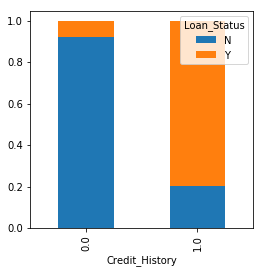

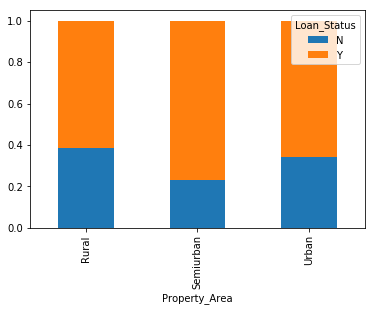

In [123]:
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status']) 
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

In [124]:
'''
It seems people with credit history as 1 are more likely to get their loans approved.
Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.
'''

'\nIt seems people with credit history as 1 are more likely to get their loans approved.\nProportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.\n'

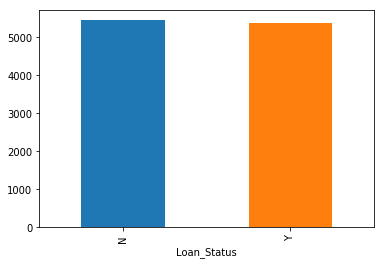

In [125]:
#Numerical Variable
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Text(0, 0.5, 'Percentage')

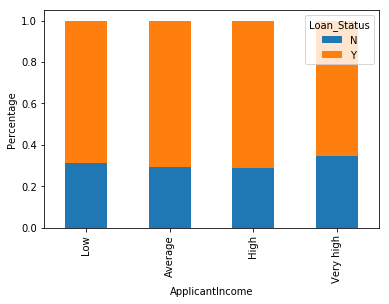

In [126]:
'''
Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for 
the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.
'''
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high'] 
train['Income_bin']=pd.cut(df['ApplicantIncome'],bins,labels=group)
Income_bin=pd.crosstab(train['Income_bin'],train['Loan_Status']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('ApplicantIncome') 
plt.ylabel('Percentage')

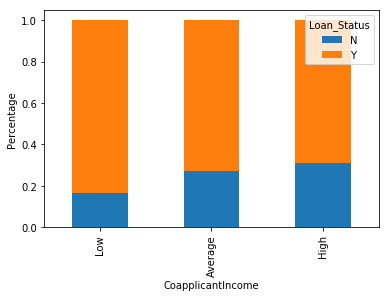

In [127]:
'''
It can be inferred that Applicant income does not affect the chances of loan approval which contradicts our 
hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high.

We will analyze the coapplicant income and loan amount variable in similar manner.
'''
bins=[0,1000,3000,42000] 
group=['Low','Average','High'] 
train['Coapplicant_Income_bin']=pd.cut(df['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(train['Coapplicant_Income_bin'],train['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('CoapplicantIncome')
P = plt.ylabel('Percentage')

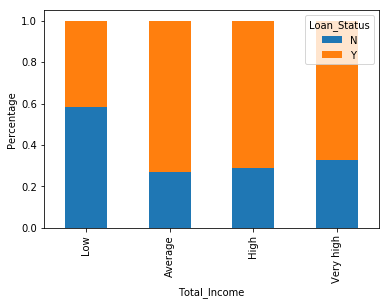

In [128]:
'''
It shows that if coapplicant’s income is less the chances of loan approval are high. But this does not look right. 
The possible reason behind this may be that most of the applicants don’t have any coapplicant so the coapplicant income 
for such applicants is 0 and hence the loan approval is not dependent on it. So we can make a new variable in which we 
will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

Let us combine the Applicant Income and Coapplicant Income and see the combined effect of Total Income on the Loan_Status.
'''
train['Total_Income']=train['ApplicantIncome']+train['CoapplicantIncome']
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(train['Total_Income_bin'],train['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

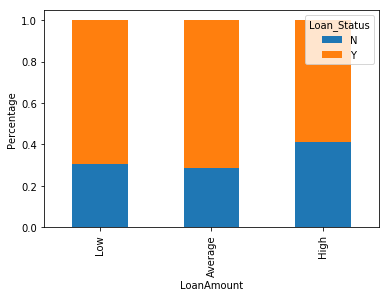

In [129]:
'''
We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to 
that of applicants with Average, High and Very High Income.

Let’s visualize the Loan amount variable.
'''
bins=[0,100,200,700] 
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(df['LoanAmount'],bins,labels=group)
LoanAmount_bin=pd.crosstab(train['LoanAmount_bin'],train['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount') 
P = plt.ylabel('Percentage')

In [130]:
'''
It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of 
High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high 
when the loan amount is less.

Let’s drop the bins which we created for the exploration part. We will change the 3+ in dependents variable to 3 to 
make it a numerical variable.We will also convert the target variable’s categories into 0 and 1 so that we can find 
its correlation with numerical variables. One more reason to do so is few models like logistic regression takes only 
numeric values as input. We will replace N with 0 and Y with 1.
'''
train=train.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True)
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)

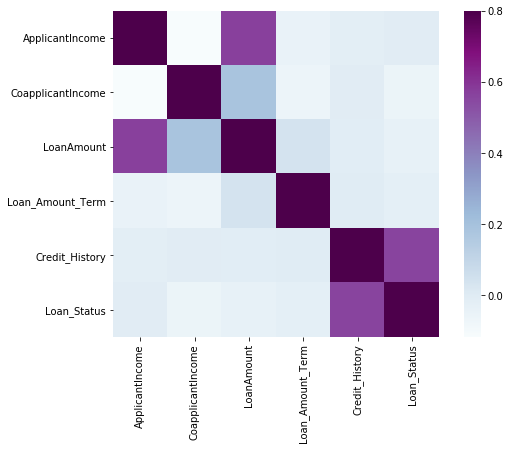

In [131]:
'''
Now lets look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. 
Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.
'''
matrix = train.corr() 
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [132]:
'''
We see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status).
LoanAmount is also correlated with CoapplicantIncome.
'''

'\nWe see that the most correlated variables are (ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status).\nLoanAmount is also correlated with CoapplicantIncome.\n'

In [133]:
#Dealing with missing Values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null int64
dtypes: float64(4), int64(2), object(7)
memory usage: 62.4+ KB


In [134]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [135]:
#For categorical variable fill null values with mode and for numerical value fill with mean or median
train["Gender"].fillna(train["Gender"].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True) 
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

In [136]:
#As there will missing values in test data lets fill in same approach
test['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

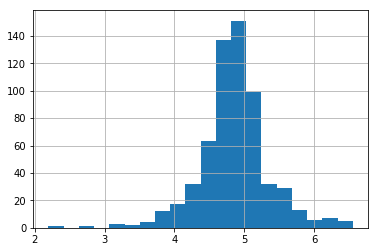

In [137]:
'''
Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer. 
This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log
transformation, it does not affect the smaller values much, but reduces the larger values. So, we get a distribution 
similar to normal distribution.
Let’s visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.
'''
train["LoanAmount_log"] = np.log(train["LoanAmount"])
train["LoanAmount_log"].hist(bins=20)
test["LoanAmount_log"] = np.log(test["LoanAmount"])

In [138]:
#Model Building
'''
Lets drop the Loan_ID variable as it do not have any effect on the loan status. We will do the same changes to the
test dataset which we did for the training dataset.
'''
train = train.drop("Loan_ID",axis=1)
test = test.drop("Loan_ID",axis=1)

In [139]:
'''
Sklearn requires the target variable in a separate dataset.So, we will drop our target variable from the train 
dataset and save it in another dataset.
'''
X = train.drop("Loan_Status",1)
y = train.Loan_Status

In [140]:
'''
Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a 
series of 0 and 1, making them lot easier to quantify and compare.
'''
X = pd.get_dummies(X)
train=pd.get_dummies(train) 
test=pd.get_dummies(test)

In [141]:
#Now we will train the model on training dataset and make predictions for the test dataset. 
X_train,X_cv,y_train,y_cv = train_test_split(X ,y ,test_size=0.3)

In [145]:
model = LogisticRegression(random_state=20)
model.fit(X_train ,y_train)
pred_cv = model.predict(X_cv)
accuracy_score(y_cv ,pred_cv)

C:\Users\User\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.8

In [146]:
#Lets make prediction for test dataset
pred_test = model.predict(test)

In [149]:
'''
Lets import the submission file which we have to submit on the solution checker.

We only need the Loan_ID and the corresponding Loan_Status for the final submission. we will fill these columns 
with the Loan_ID of test dataset and the predictions that we made, i.e., pred_test respectively.
'''
submission = pd.read_csv("sample_submission_49d68Cx.csv")
submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_org['Loan_ID']

In [150]:
#Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)

In [151]:
#Finally we will convert the submission to .csv format and make submission to check the accuracy on the leaderboard.

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')